In [1]:
import numpy as np
import pickle
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
embedding=np.loadtxt("wiki_b_comp/embedding.txt")


In [3]:
itw=pickle.load(open('wiki_b_comp/itw.p','rb'))
wti=pickle.load(open('wiki_b_comp/wti.p','rb'))

In [42]:
wti['boeing_2']

4121

In [4]:
wto=pickle.load(open('wiki_b_comp/wto.p','rb'))

In [4]:
# for i in range(embedding.shape[0]):
#     embedding[i,:]=embedding[i,:]/np.linalg.norm(embedding[i,:])

In [5]:
# fpeople=pickle.load(open('train_new/Forbes_People_Final.pickle','rb'))
ncomp=pickle.load(open('train_new/Nasdaq_Company_Final_revised','rb'))
scomp=pickle.load(open('train_new/Sec_Company_Final_revised','rb'))
# speople=pickle.load(open('train_new/Sec_People_Final.pickle','rb'))


In [6]:
# fpeople=fpeople.rename(index=str, columns={"People": "entity"})
# speople=speople.rename(index=str, columns={"People": "entity"})
ncomp=ncomp.rename(index=str,columns={"Company":"entity"})
scomp=scomp.rename(index=str,columns={"Company":"entity"})

In [8]:
# big_df=fpeople.append(ncomp).append(scomp).append(speople)

In [7]:
big_df=ncomp.append(scomp)

In [8]:
index=[]
raw_name=[]
new_name=[]
poc=[]
embeds=[]
target=[]
showup=[]
for k,v in itw.items():
    index.append(k)
    raw_name.append(v)
    showup.append(wto[v])
    new_name.append(v[:-2])
    if v[-1]=='1':
        poc.append('p')
    else:
        poc.append('c')
    embeds.append(embedding[k,:])
    target.append(' ')

In [9]:
import pandas as pd

weknow=pd.DataFrame({'index':index,'raw_name':raw_name,'new_name':new_name,'poc':poc,'feature':embeds,'showup':showup,'target':target})

In [10]:
from collections import Counter
cnt = Counter()
temp=[]
for w in big_df.entity:
    temp.append(w)
    #temp.append(w)
cnt.update(temp)

In [11]:
weknow=weknow[weknow.new_name.isin(cnt)]

In [119]:
tech_df.join(non_tech_df.set_index('index'), on='index',rsuffix='rindex',how='inner')

,feature,index,new_name,poc,raw_name,showup,target,Industry,istech,featurerindex,new_namerindex,pocrindex,raw_namerindex,showuprindex,targetrindex,Industryrindex,istechrindex


In [12]:
weknow=weknow.join(big_df.set_index('entity'), on='new_name',how='inner')

In [13]:
weknow=(weknow.drop_duplicates(subset=weknow.columns[1:-1]))

In [43]:
len(weknow)

6025

In [78]:
weknow=weknow.sort_values(by=['showup'],ascending=False)

In [89]:

X_f=[]
for vec in weknow[weknow.Industry=='Technology'].iloc[-int(957*0.3):].feature:
    X_f.append(vec)
X_f=np.array(X_f)

X_t=[]
for vec in weknow[weknow.Industry!='Technology'].iloc[-1000:].feature:
    X_t.append(vec)
X_t=np.array(X_t)

Y=tsne(np.concatenate((X_f,X_t),axis=0),3,150,20)
Y_f = Y[:len(X_f),:]
Y_t = Y[len(X_f):,:]

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1287...
Computing P-values for point 500 of 1287...
Computing P-values for point 1000 of 1287...
Mean value of sigma: 0.761536
Iteration 10: error is 21.245233
Iteration 20: error is 21.158833
Iteration 30: error is 21.164235
Iteration 40: error is 21.353621
Iteration 50: error is 21.257027
Iteration 60: error is 21.420986
Iteration 70: error is 21.481895
Iteration 80: error is 21.437907
Iteration 90: error is 21.607250
Iteration 100: error is 21.572635
Iteration 110: error is 3.976379
Iteration 120: error is 3.498742
Iteration 130: error is 3.196991
Iteration 140: error is 3.014476
Iteration 150: error is 2.875056
Iteration 160: error is 2.774461
Iteration 170: error is 2.718800
Iteration 180: error is 2.679755
Iteration 190: error is 2.649996
Iteration 200: error is 2.626744
Iteration 210: error is 2.606950
Iteration 220: error is 2.590868
Iteration 230: error is 2.578315
Iteration 2

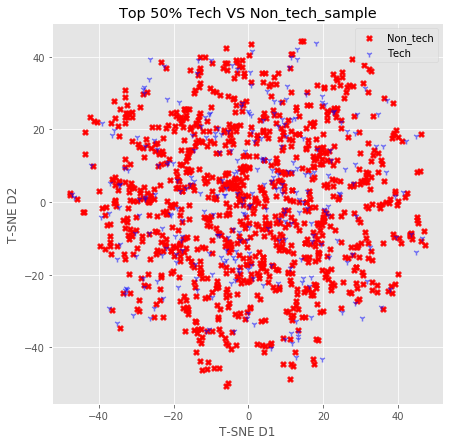

In [90]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(7,7))
    plt.scatter(Y_t[:,0],Y_t[:,1],color='r',marker='X',label='Non_tech')
    plt.scatter(Y_f[:,0],Y_f[:,1],color='b',marker='1',alpha=0.5,label='Tech')
    plt.xlabel("T-SNE D1")
    plt.ylabel("T-SNE D2")
    plt.title("Top 50% Tech VS Non_tech_sample")
    plt.legend()

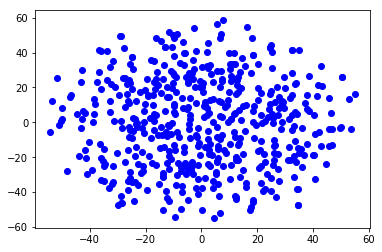

In [36]:
plt.scatter(Y_f[:,0],Y_f[:,1],color='b')

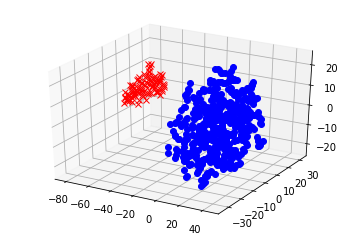

In [43]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

colors=['r', 'b']

ax = plt.subplot(111, projection='3d')

ax.plot(Y_f[:,0], Y_f[:,1], Y_f[:,2], 'x', color=colors[0])
ax.plot(Y_t[:,0],Y_t[:,1], Y_t[:,2], 'o', color=colors[1])

plt.show()


In [116]:
weknow=weknow[(weknow.showup<100)]
weknow=weknow[ weknow.showup>10]

In [90]:
len(weknow)

6025

In [93]:
#weknow.iloc[-1000:].groupby(['Industry']).count()

In [63]:
weknow.groupby(['Industry']).count()

,feature,index,new_name,poc,raw_name,showup,target
Industry,,,,,,,
Basic Industries,639,639,639,639,639,639,639
Consumer Services,1467,1467,1467,1467,1467,1467,1467
Finance,784,784,784,784,784,784,784
Health Care,481,481,481,481,481,481,481
Media,97,97,97,97,97,97,97
Miscellaneous,938,938,938,938,938,938,938
Public Utilities,370,370,370,370,370,370,370
Technology,957,957,957,957,957,957,957
Transportation,292,292,292,292,292,292,292


In [99]:
df=weknow.copy()

In [23]:
df=df[df.Industry != 'Media']
#df=df[df.Industry != 'Public Utilities']
df=df[df.Industry != 'Transportation']
#df=df[df.Industry != 'Health Care']

In [100]:
df.groupby(['Industry']).count()

,feature,index,new_name,poc,raw_name,target
Industry,,,,,,
Basic Industries,611,611,611,611,611,611
Consumer Services,871,871,871,871,871,871
Finance,706,706,706,706,706,706
Health Care,472,472,472,472,472,472
Media,91,91,91,91,91,91
Miscellaneous,876,876,876,876,876,876
Public Utilities,349,349,349,349,349,349
Technology,1417,1417,1417,1417,1417,1417
Transportation,269,269,269,269,269,269


In [32]:
len(df)

6025

In [135]:
# for ind in np.unique(weknow.Industry):
#     plt.hist(weknow[(weknow.Industry==ind) & (weknow.showup<300)].showup)
#     plt.show()

In [50]:
sum(weknow.showup>10)

4393

# Onevsall

In [52]:
df['istech']=(df['Industry']=='Health Care')

tech_df=df[df.istech]
non_tech_df=df[-df.istech]

train_x=[]
train_y=[]

train_len=140
total=len(tech_df)

for vec in (tech_df.iloc[:train_len].feature):
    train_x.append(list(vec))
for vec in (non_tech_df.iloc[:train_len].feature):
    train_x.append(list(vec))
train_y=np.array([1]*train_len+[0]*train_len)


test_x=[]

for vec in (tech_df.iloc[train_len:total].feature):
    test_x.append(list(vec))
for vec in (non_tech_df.iloc[train_len:total].feature):
    test_x.append(list(vec))
test_y=np.array([1]*len(tech_df.iloc[train_len:total].feature)+[0]*len(non_tech_df.iloc[train_len:total].feature))

train_x=np.array(train_x)
test_x=np.array(test_x)

# Together

## upsampling

In [33]:
train_len=4500


test_df=df[train_len:]
df=df[:train_len]

df.groupby(['Industry']).count()

max_count=1417
updf=pd.DataFrame()
for ind in np.unique(df['Industry']):
    print(ind)
    count=len(df[df.Industry==ind])
    
    if count<max_count:
        new_index=(list(np.random.choice(df[df.Industry==ind].index,max_count-count,replace=False))+list(df[df.Industry==ind].index))
        print(len(df.loc[new_index]))
        updf=pd.concat((updf,df.loc[new_index]),axis=0)

old_index=np.arange(len(updf))
print(len(old_index))
np.random.shuffle(old_index)
print(len(old_index))
updf=updf.iloc[old_index]
print(len(updf))

train_x=[]
for vec in (updf.feature):
    train_x.append(list(vec))
test_x=[]
for vec in (test_df.feature):
    test_x.append(list(vec))
train_x=np.array(train_x)
test_x=np.array(test_x)

train_y=updf.Industry
test_y=test_df.Industry

Basic Industries
1417
Consumer Services
1417
Finance
1417
Health Care
1417
Media
1417
Miscellaneous
1417
Public Utilities
1417
Technology
1417
Transportation
1417
12753
12753
12753


## Downsampling

In [100]:

df=weknow
train_len=2400


#df=df[df.Industry != 'Public Utilities']

df=df[df.Industry != 'Media']
# df=df[df.Industry != 'Public Utilities']
df=df[df.Industry != 'Transportation']
# df=df[df.Industry != 'Health Care']


old_index=np.arange(len(df))
print(len(old_index))
np.random.shuffle(old_index)
print(len(old_index))
df=df.iloc[old_index]
print(len(df))


test_df=df[train_len:]
df=df[:train_len]

min_count=df.groupby('Industry').count().min()[0]
updf=pd.DataFrame()
for ind in np.unique(df['Industry']):
    print(ind)
    count=len(df[df.Industry==ind])
    #print(count)
    #if count>min_count:
    new_index=(list(np.random.choice(df[df.Industry==ind].index,min_count,replace=False)))
    print(len(df.loc[new_index]))
    updf=pd.concat((updf,df.loc[new_index]),axis=0)

old_index=np.arange(len(updf))
print(len(old_index))
np.random.shuffle(old_index)
print(len(old_index))
updf=updf.iloc[old_index]
print(len(updf))

train_x=[]
for vec in (updf.feature):
    train_x.append(list(vec))
test_x=[]
for vec in (test_df.feature):
    test_x.append(list(vec))
train_x=np.array(train_x)
test_x=np.array(test_x)

train_y=updf.Industry
test_y=test_df.Industry

1320
1320
1320
Basic Industries
82
Consumer Services
82
Finance
82
Health Care
82
Miscellaneous
82
Public Utilities
82
Technology
82
574
574
574


In [25]:
# train_len=3500


# test_df=df[train_len:]
# df=df[:train_len]

df=weknow.iloc[:].copy()
df=df[df.Industry != 'Media']
# df=df[df.Industry != 'Public Utilities']
df=df[df.Industry != 'Transportation']
#df=df[df.Industry != 'Health Care']

min_count=df.groupby('Industry').count().min()[0]
traindf=pd.DataFrame()
testdf=pd.DataFrame()
for ind in np.unique(df['Industry']):
    print(ind)
    count=len(df[df.Industry==ind])
    #print(count)
    #if count>min_count:
    new_index=(list(np.random.choice(df[df.Industry==ind].index,min_count,replace=False)))
    print(len(df.loc[new_index]))
    
    traindf=pd.concat((traindf,df.loc[new_index[:int(len(new_index)*0.8)]]),axis=0)
    testdf=pd.concat((testdf,df.loc[new_index[int(len(new_index)*0.8):]]),axis=0)

old_index=np.arange(len(traindf))
print(len(old_index))
np.random.shuffle(old_index)
print(len(old_index))
traindf=traindf.iloc[old_index]
print(len(traindf))
    
old_index=np.arange(len(testdf))
print(len(old_index))
np.random.shuffle(old_index)
print(len(old_index))
testdf=testdf.iloc[old_index]
print(len(traindf))


train_x=[]
for vec in (traindf.feature):
    train_x.append(list(vec))
test_x=[]
for vec in (testdf.feature):
    test_x.append(list(vec))
train_x=np.array(train_x)
test_x=np.array(test_x)

train_y=traindf.Industry
test_y=testdf.Industry

Basic Industries
370
Consumer Services
370
Finance
370
Health Care
370
Miscellaneous
370
Public Utilities
370
Technology
370
2072
2072
2072
518
518
2072


In [26]:
print(test_x.shape)
print(test_y.shape)
print(train_x.shape)
print(train_y.shape)

(518, 150)
(518,)
(2072, 150)
(2072,)


In [238]:
np.sum(train_y,0)

array([322, 322, 322, 322, 322, 322, 322])

In [33]:
ind_list=np.unique(df['Industry'])
ind_list

array(['Basic Industries', 'Consumer Services', 'Finance', 'Health Care',
       'Miscellaneous', 'Public Utilities', 'Technology'], dtype=object)

In [28]:
label_binarize(['Transportation'], classes=ind_list)

array([[0, 0, 0, 0, 0, 0, 0]])

In [29]:
train_y=label_binarize(train_y, classes=ind_list)
test_y=label_binarize(test_y, classes=ind_list)

In [ ]:
for cri in ['entropy','gini']:
    print(cri)
    for max_depth in [10,15,20]:
        print('depth',max_depth)
        for mf in [10,20,50,70]:
            print('mf',mf)
            for msl in [1,10,100]:
                print('msl',msl)
                for mss in [2,10,20]:
                    print('mss',mss)
                    clf = RandomForestClassifier(n_estimators=1000,max_depth=max_depth,criterion=cri,n_jobs=8,max_features=mf)
                    clf = OneVsRestClassifier(clf)
                    clf.fit(train_x,train_y)
                    pred_prob=clf.predict_proba(test_x)
                    pred_y=np.argmax(pred_prob, axis=1)
                    test=np.argmax(test_y, axis=1)
                    accu=sum(pred_y==test)/len(test_y)
                    print(accu)

In [30]:
clf = RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='gini',n_jobs=8,max_features=10)
clf = OneVsRestClassifier(clf)
clf.fit(train_x,train_y)
pred_prob=clf.predict_proba(test_x)

pred_y=np.argmax(pred_prob, axis=1)
test=np.argmax(test_y, axis=1)

accu=sum(pred_y==test)/len(test)
print(accu)

0.144787644788


In [104]:
from sklearn.svm import SVC
train_y=label_binarize(train_y, classes=ind_list)
test_y=label_binarize(test_y, classes=ind_list)

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel='poly',probability=True,degree=2,C=1e6,tol=1e-06)
svm = OneVsRestClassifier(svm)
svm.fit(train_x,train_y)

pred_prob=svm.predict_proba(test_x)

pred_y=np.argmax(pred_prob, axis=1)
test=np.argmax(test_y, axis=1)

accu=sum(pred_y==test)/len(test)
print(accu)

0.150579150579


In [32]:

svm = LogisticRegression()
svm = OneVsRestClassifier(svm)
svm.fit(train_x,train_y)

pred_prob=svm.predict_proba(test_x)

pred_y=np.argmax(pred_prob, axis=1)
test=np.argmax(test_y, axis=1)

accu=sum(pred_y==test)/len(test)
print(accu)

0.148648648649


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly',probability=True,degree=2,C=1e6,tol=1e-06)
svm = OneVsRestClassifier(svm)
svm.fit(train_x,train_y)

pred_prob=svm.predict_proba(test_x)

pred_y=np.argmax(pred_prob, axis=1)
test=np.argmax(test_y, axis=1)

accu=sum(pred_y==test)/len(test)
print(accu)

In [309]:
ind_list

array(['Basic Industries', 'Consumer Services', 'Finance', 'Health Care',
       'Miscellaneous', 'Public Utilities', 'Technology'], dtype=object)

In [57]:
god_x=[]
god_y=[]
for name in god_df.Industry:
    god_y.append(name)
for vec in god_df.feature:
    god_x.append(list(vec))
god_x=np.array(god_x)

In [397]:
god_see=np.array([])
for rf in clfs:

    this_pred=rf.predict_proba(god_x)[:,1].reshape(-1,1)
    if len(god_see)==0:
        god_see=this_pred
    else:
        god_see=np.concatenate((god_see,this_pred),axis=1)

In [398]:
n=0
acc=0
for i in np.argmax(god_see,1):
    
    if ind_list[i]==god_y[n]:
        acc+=1
    n+=1

acc/len(god_y)

0.2091791703442189

In [390]:
p=clf.predict_proba(god_x)[:,0].reshape(-1,1)
t=(np.array(god_y)=='Health Care')+0
fpr, tpr, thresholds = metrics.roc_curve(t, p, pos_label=1)
print(metrics.auc(fpr, tpr))

0.506883689386


In [399]:
for i in range(len(clfs)):
    p=god_see[:,i]
    t=(np.array(god_y)==ind_list[i])+0
#     y = test_y+1
#     pred = lg.predict_proba(test_x)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(t, p, pos_label=1)
    print(metrics.auc(fpr, tpr))

0.530016229606
0.503417697085
0.477286595261
0.506646320787
0.482668903722
0.474589533434
0.498845124642


In [159]:
pure_df=weknow.iloc[int(len(weknow)*0.2):].copy()
god_df=weknow.iloc[:int(len(weknow)*0.2)].copy()
god_x=[]
god_y=[]
for name in god_df.Industry:
    god_y.append(name)
for vec in god_df.feature:
    god_x.append(list(vec))
god_x=np.array(god_x)

## New Way

In [160]:
clfs=[]
for ind in ind_list:
    df=pure_df.copy()
    df['istech']=(df['Industry']==ind)

    tech_df=df[df.istech].copy()
    non_tech_df=df[-df.istech].copy()

    train_x=[]
    train_y=[]

    train_len=len(tech_df)
    print("-"*50)
    print("Industry: ", ind)
    
    print(train_len)
    for vec in (tech_df.feature):
        train_x.append(list(vec))
    for vec in (non_tech_df.iloc[:train_len].feature):
        train_x.append(list(vec))
    train_y=np.array([1]*train_len+[0]*train_len)

    train_x=np.array(train_x)


    clf = RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='entropy',n_jobs=8,max_features=50)
    clf.fit(train_x,train_y)
    clfs.append(clf)


    new_god_x=(god_x[np.array(god_y)==ind,:])
    b_god_x=(god_x[np.array(god_y)!=ind,:][:len(new_god_x),:])
    new_god_x=np.concatenate((new_god_x,b_god_x),axis=0)
    new_god_y=np.array(len(b_god_x)*[1]+len(b_god_x)*[0])
    
    pred_prob=clf.predict_proba(new_god_x)
    t=new_god_y
    print(sum(t))
    fpr, tpr, thresholds = metrics.roc_curve(t, pred_prob[:,1], pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print(auc)

#     print("rf auc: ",auc)
#     print("rf accuracy: ",accuracy)
    

--------------------------------------------------
Industry:  Basic Industries
496
115
0.626086956522
--------------------------------------------------
Industry:  Consumer Services
676
195
0.646679815911
--------------------------------------------------
Industry:  Finance
581
125
0.631168
--------------------------------------------------
Industry:  Health Care
418
54
0.743141289438
--------------------------------------------------
Industry:  Media
57
34
0.794117647059
--------------------------------------------------
Industry:  Miscellaneous
691
185
0.680379839299
--------------------------------------------------
Industry:  Public Utilities
277
72
0.668981481481
--------------------------------------------------
Industry:  Technology
1129
288
0.615029417438
--------------------------------------------------
Industry:  Transportation
205
64
0.56396484375


# Old Way

In [107]:
from sklearn.utils import shuffle

In [108]:
for ind in ind_list:
    df=weknow.copy()
    df=shuffle(df)
    df['istech']=(df['Industry']==ind)

    tech_df=df[df.istech].copy()
    non_tech_df=df[-df.istech].copy()
    
    
    
    train_x=[]
    train_y=[]

    train_len=int(len(tech_df) * 0.8)
    total=len(tech_df)
    print(train_len)
    for vec in (tech_df.iloc[:train_len].feature):
        train_x.append(list(vec))
    for vec in (non_tech_df.iloc[:train_len].feature):
        train_x.append(list(vec))
    train_y=np.array([1]*train_len+[0]*train_len)
    test_x=[]
    for vec in (tech_df.iloc[train_len:total].feature):
        test_x.append(list(vec))
    for vec in (non_tech_df.iloc[train_len:total].feature):
        test_x.append(list(vec))
    test_y=np.array([1]*len(tech_df.iloc[train_len:total].feature)+[0]*len(non_tech_df.iloc[train_len:total]))

    train_x=np.array(train_x)
    test_x=np.array(test_x)

    clf = RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='entropy',n_jobs=8,max_features=50)
    clf.fit(train_x,train_y)
    pred_prob=clf.predict_proba(test_x)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_prob[:,1], pos_label=1)
    auc=metrics.auc(fpr, tpr)
    accuracy=sum(np.argmax(pred_prob,1)==test_y)/len(test_y)
    print("-"*50)
    print("Industry: ", ind)
    print("rf auc: ",auc)
    print("rf accuracy: ",accuracy)
    

#     best=0
#     dd=0
#     acc=0
#     for delta in np.arange(0,0.9,0.01):
#         mody_pred=pred_prob.copy()
#         mody_pred[:,0]=mody_pred[:,0]+delta
#         f_pred=np.argmax(mody_pred,1)
#         if sum(f_pred[f_pred==test_y]==1)/sum(f_pred==1)> best:
#             best=sum(f_pred[f_pred==test_y]==1)/sum(f_pred==1)
#             dd=delta
#             recall=sum(f_pred[f_pred==test_y]==1)/sum(test_y==1)
#     print(best)
#     print(dd)
#     print(recall)
# #     pred_prob=lg.predict_proba(test_x)
#     fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_prob[:,1], pos_label=1)
#     auc=metrics.auc(fpr, tpr)
#     accuracy=sum(np.argmax(pred_prob,1)==test_y)/len(test_y)
    
#     print("lg auc: ",auc)
#     print("lg accuracy: ",accuracy)

243
--------------------------------------------------
Industry:  Basic Industries
rf auc:  0.523246439129
rf accuracy:  0.5
560
--------------------------------------------------
Industry:  Consumer Services
rf auc:  0.529081632653
rf accuracy:  0.539285714286
314
--------------------------------------------------
Industry:  Finance
rf auc:  0.505047268066
rf accuracy:  0.537974683544
331
--------------------------------------------------
Industry:  Miscellaneous
rf auc:  0.538394542024
rf accuracy:  0.542168674699
138
--------------------------------------------------
Industry:  Public Utilities
rf auc:  0.42693877551
rf accuracy:  0.385714285714
370
--------------------------------------------------
Industry:  Technology
rf auc:  0.457162677766
rf accuracy:  0.483870967742


In [133]:
weknow

,feature,index,new_name,poc,raw_name,target,Industry
127,"[-1.01837813854, -1.18766260147, 0.75023120641...",127,essex,c,essex_2,,Consumer Services
169,"[0.174408882856, 0.00963113643229, 0.328448265...",169,rti,c,rti_2,,Consumer Services
198,"[0.410659432411, -0.807502388954, -1.102667570...",198,google,c,google_2,,Technology
221,"[0.028153102845, 0.40766415, 0.444866508245, 0...",221,aurora biosciences,c,aurora biosciences_2,,Consumer Services
243,"[-0.0671441927552, -0.0350135229528, -0.356651...",243,newmarket,c,newmarket_2,,Basic Industries
251,"[0.45208260417, -0.52452403307, 0.901065826416...",251,manchester,c,manchester_2,,Miscellaneous
272,"[-1.74163806438, 0.15512534976, -0.56323456764...",272,microsoft,c,microsoft_2,,Technology
342,"[0.633397817612, -0.600165903568, 0.3080895543...",342,facebook,c,facebook_2,,Technology
385,"[0.849318802357, 0.237788707018, 0.55742830038...",385,arcelormittal,c,arcelormittal_2,,Basic Industries
508,"[0.616921365261, 0.548930823803, 0.58728307485...",508,tripos,c,tripos_2,,Technology


In [274]:

pred_prob=svm.predict_proba(test_x)

pred_y=np.argmax(pred_prob, axis=1)
test=np.argmax(test_y, axis=1)

accu=sum(pred_y==test)/len(test)
print(accu)

0.155102040816


In [141]:
meta_train_x=svm.predict_proba(train_x)
meta_train_y=train_y
meta_test_x=svm.predict_proba(test_x)
meta_test_y=test_y


In [239]:
# clf_meta = RandomForestClassifier(n_estimators=100,max_depth=6,criterion='entropy',n_jobs=8,max_features=7)
# clf_meta = OneVsRestClassifier(clf_meta)
# clf_meta.fit(meta_train_x,meta_train_y)

# pred_prob=clf_meta.predict_proba(meta_test_x)
            
    
svm_meta = SVC(kernel='rbf',probability=True,degree=2,C=1000,tol=0.00001)
svm_meta = OneVsRestClassifier(svm_meta)
svm_meta.fit(meta_train_x,meta_train_y)

pred_prob=svm_meta.predict_proba(meta_test_x)

pred_y=np.argmax(pred_prob, axis=1)
test=np.argmax(meta_test_y, axis=1)

accu=sum(pred_y==test)/len(test)
print(accu)

0.430612244898


In [184]:
svm_meta.predict_proba(meta_test_x[:10])

array([[  5.05514348e-04,   3.99042946e-04,   9.86088670e-01,
          9.31384994e-04,   1.12984643e-03,   8.75271977e-04,
          8.91434841e-04],
       [  8.85692441e-04,   7.17109927e-04,   1.10179436e-03,
          4.55456780e-03,   1.68314420e-03,   1.39006585e-03,
          5.24882248e-01],
       [  8.18788962e-04,   8.50932522e-04,   9.84172025e-01,
          8.31656669e-04,   9.77701793e-04,   5.48702342e-04,
          7.45647643e-04],
       [  2.96609728e-03,   9.65979588e-03,   1.83895194e-03,
          6.80660249e-02,   2.36556006e-03,   4.18443123e-04,
          2.33544504e-03],
       [  1.41990885e-02,   1.10484140e-02,   6.74928533e-04,
          1.03039679e-03,   1.95367013e-02,   2.62583147e-03,
          1.01742143e-03],
       [  1.19979784e-03,   9.34741924e-03,   1.29939222e-03,
          2.04665170e-03,   1.05927021e-01,   2.64122915e-03,
          7.50462320e-04],
       [  1.42601880e-03,   5.33999548e-03,   1.93873050e-03,
          1.07297008e-03,   1.91

In [308]:
for i in range(len(pred_prob[0,:])):
    p=pred_prob[:,i]
    t=test_y[:,i]
#     y = test_y+1
#     pred = lg.predict_proba(test_x)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(t, p, pos_label=1)
    print(metrics.auc(fpr, tpr))

0.497959183673
0.496972789116
0.500680272109
0.474659863946
0.537653061224
0.430408163265
0.484421768707


In [110]:
lg=LogisticRegression(C=1,max_iter=100)
lg.fit(train_x,train_y)

ValueError: bad input shape (1954, 7)

In [83]:
clf = RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='entropy',n_jobs=8,max_features=50)
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
pred_prob=clf.predict_proba(test_x)
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_prob[:,1], pos_label=1)
metrics.auc(fpr, tpr)

0.9130859375

In [87]:
sum(np.argmax(pred_prob,1)==test_y)/len(test_y)

0.859375

In [313]:
np.argmax(mody_pred,1)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
for i in test_x:
    for j in train_x:
        if i[0]==j[0]:
            print(i,j)

In [108]:
mody_pred=pred_prob.copy()
mody_pred[:,0]=mody_pred[:,0]+0.22
sum(np.argmax(mody_pred,1)==test_y)/len(test_y)

In [109]:
sum(np.argmax(mody_pred,1)==test_y)/len(test_y)

0.890625

In [111]:
np.argmax(mody_pred,1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [194]:
sum(abs(clf.predict(test_x[:190])-test_y[:190]))/190

0.015789473684210527

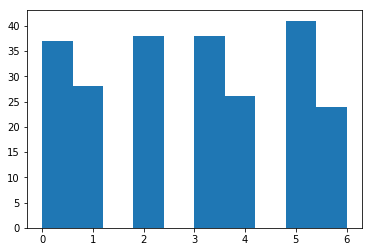

In [202]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(pred_y[pred_y==test])
plt.show()

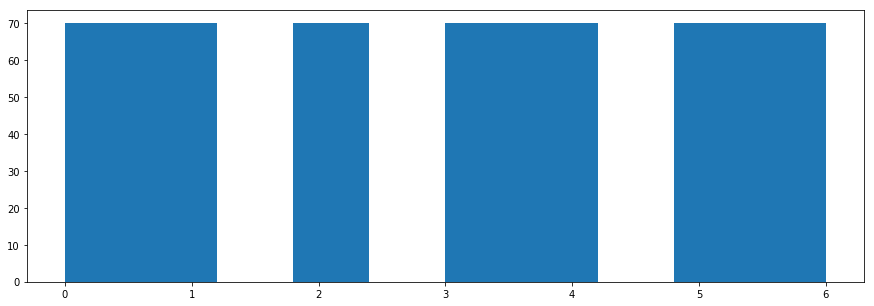

In [203]:
plt.figure(figsize=(15,5))
plt.hist(test)
plt.show()

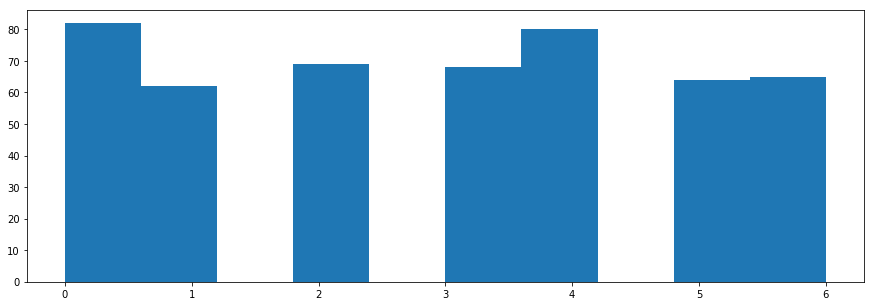

In [204]:
plt.figure(figsize=(15,5))
plt.hist(pred_y)
plt.show()

In [205]:
industry=[]
precision=[]
recall=[]
number=[]
actual=[]
for ind in np.arange(len(ind_list)):
    precision.append(sum(test[pred_y==ind]==ind)/sum(pred_y==ind))
    recall.append(sum(pred_y[test==ind]==ind)/sum(test==ind))
    industry.append(ind)
    number.append(sum(pred_y==ind))
    actual.append(sum(test==ind))
pd.DataFrame({'precision':precision,'recall':recall,'industry':industry,'number':number,'actual':actual})

,actual,industry,number,precision,recall
0,70,0,82,0.451220,0.528571
1,70,1,62,0.451613,0.400000
2,70,2,69,0.550725,0.542857
3,70,3,68,0.558824,0.542857
4,70,4,80,0.325000,0.371429
5,70,5,64,0.640625,0.585714
6,70,6,65,0.369231,0.342857


,actual,industry,number,precision,recall
0,66,0,66,0.151515,0.151515
1,77,1,62,0.193548,0.155844
2,59,2,64,0.062500,0.067797
3,64,3,53,0.132075,0.109375
4,96,4,113,0.194690,0.229167
5,28,5,46,0.173913,0.285714
6,112,6,98,0.275510,0.241071


In [172]:
ind_list

array(['Basic Industries', 'Consumer Services', 'Finance', 'Health Care',
       'Miscellaneous', 'Public Utilities', 'Technology'], dtype=object)

In [173]:
check=pd.DataFrame(pred_prob)
check['pred']=pred_y
check['target']=test

In [174]:

check[]

,0,1,2,3,4,5,6,pred,target
0,0.051463,0.165558,0.159112,0.471354,0.042239,0.147003,0.032754,3,6
1,0.096288,0.156767,0.164604,0.060587,0.040228,0.155268,0.129166,2,4
2,0.042493,0.468007,0.227794,0.021532,0.233669,0.082108,0.046157,1,1
3,0.048260,0.106045,0.078241,0.195817,0.122725,0.165982,0.118338,3,1
4,0.084541,0.223605,0.126194,0.028380,0.331000,0.020312,0.120422,4,6
5,0.185332,0.171711,0.105685,0.013681,0.271151,0.014812,0.241316,4,6
6,0.066307,0.112017,0.213311,0.034016,0.099271,0.127145,0.183636,2,6
7,0.370086,0.118264,0.166950,0.038752,0.070926,0.045508,0.108532,0,6
8,0.093721,0.122343,0.112409,0.040492,0.111683,0.095280,0.115443,1,1
9,0.055429,0.291725,0.077716,0.066826,0.093954,0.192852,0.136031,1,4


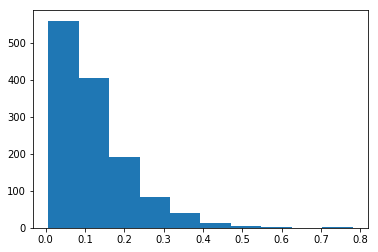

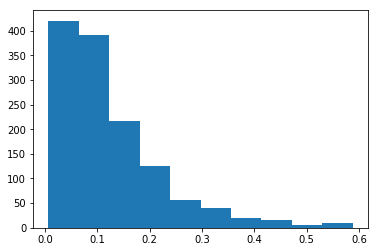

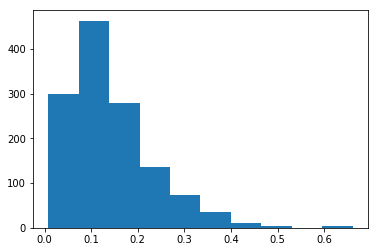

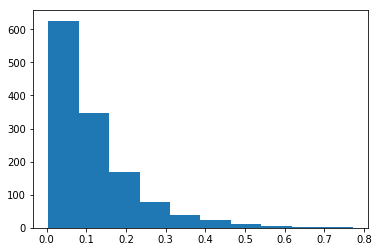

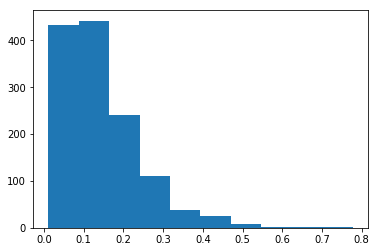

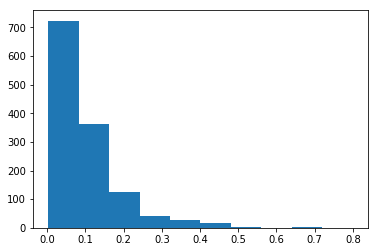

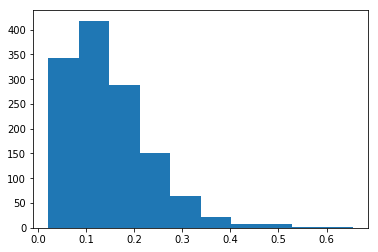

In [176]:
for i in range(7):
    plt.hist(check[i])
    plt.show()

In [119]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import os
from scipy import misc
from os import listdir

In [237]:


class snet(nn.Module):
    def __init__(self):
        super(snet, self).__init__()
        self.fc1   = nn.Linear(9, 9)
        self.fc2   = nn.Linear(9, 9)


    def forward(self, x):
        out=self.fc1(x)
        out=F.tanh(out)
        out=self.fc2(out)
        out = F.tanh(out)
        return out

In [234]:

lr=0.1
momentum=0.5

epochs=70

model=snet()

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0)

def train(epoch):
    model.train()
    for i in range(epoch):
        data=torch.FloatTensor(pred_prob_train)

        target=torch.LongTensor(train_class)

        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)

        CEloss = nn.CrossEntropyLoss()
        loss = CEloss(output, target)

        loss.backward()

        print('Loss: {:.6f}'.format( loss.data[0]))

def test():
    model.eval()
    test_loss = 0
    correct = 0

    data=torch.FloatTensor(pred_prob_test)

    target=torch.LongTensor(test_class)

    output = model(data)
    celoss = nn.CrossEntropyLoss()
    loss=celoss(output, target).data[0] # sum up batch loss
    pred = output.data.numpy() # get the index of the max log-probability
    pred=np.argmax(pred,axis=1)
    print(pred)
    print(test_class)
    correct=sum(pred==test_class)
    print(correct/len(test_class))


In [139]:
ind_list=np.unique(df['Industry'])
itd={}

In [296]:
df=weknow

train_class=[]
test_class=[]

big_test_x=[]
big_train_x=[]
clfs=[]
n=0
for ind in ind_list:
    itd[ind]=n
    df=weknow
    df['istech']=(df['Industry']==ind)

    tech_df=df[df.istech]
    non_tech_df=df[-df.istech]

    train_x=[]
    train_y=[]
    
    train_len=int(len(tech_df)*0.7)
    total=len(tech_df)
    
    train_class+=[n]*train_len
    test_class+=[n]*(total-train_len)

    for vec in (tech_df.iloc[:train_len].feature):
        train_x.append(list(vec))
        big_train_x.append(list(vec))
    for vec in (non_tech_df.iloc[:train_len].feature):
        train_x.append(list(vec))
        
    train_y=np.array([1]*train_len+[0]*train_len)


    for vec in (tech_df.iloc[train_len:].feature):
        big_test_x.append(list(vec))
    
    clf = RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='entropy',n_jobs=8,max_features=50)
    clf.fit(train_x,train_y)
    clfs.append(clf)
    
    n+=1

In [297]:
pred_prob_train=[]
pred_prob_test=[]

for clf in clfs:
    this_pred=clf.predict_proba(big_train_x)[:,0].reshape(-1,1)
    if len(pred_prob_train)==0:
        pred_prob_train=this_pred
    else:
        pred_prob_train=np.concatenate((pred_prob_train,this_pred),axis=1)

    this_pred=clf.predict_proba(big_test_x)[:,0].reshape(-1,1)
    if len(pred_prob_test)==0:
        pred_prob_test=this_pred
    else:
        pred_prob_test=np.concatenate((pred_prob_test,this_pred),axis=1)


In [262]:
clf = RandomForestClassifier(n_estimators=1000,max_depth=1,criterion='entropy',n_jobs=8,max_features=1)
clf.fit(pred_prob_train,train_class)
pred=clf.predict(pred_prob_test)

In [266]:
lg=LogisticRegression(C=1,max_iter=100)
lg.fit(pred_prob_train,train_class)
pred=lg.predict(pred_prob_test)

In [267]:
sum(pred==test_class)/len(test_class)

0.2182061579651941

In [285]:
np.unique(train_class)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [309]:
train_y=label_binarize(train_class, classes=np.unique(train_class))
test_y=label_binarize(test_class, classes=np.unique(train_class))
clf = RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='entropy',n_jobs=8,max_features=2)
clf = OneVsRestClassifier(clf)
clf.fit(pred_prob_train,train_y)


OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

In [310]:
pred=clf.predict_proba(pred_prob_test)
sum(np.argmax(pred,1)==test_class)/747

0.14725568942436412

In [306]:
np.argmax(pred,1)

array([[430, 340],
       [624, 637],
       [230, 268],
       [ 25,  48],
       [ 68, 419],
       [680, 337],
       [  5, 392],
       [680, 676],
       [175, 382]])

In [298]:
tad=[0.37,0.38,0.36,0.03,0.13,0.31,0.15,0.23,0.14]

In [299]:
for i in range(pred_prob_test.shape[1]):
    pred_prob_test[:,i]=1-2*pred_prob_test[:,i]-tad[i]

In [302]:
sum(np.argmin(pred_prob_test,1)==test_class)/747

0.17135207496653279

In [46]:
#
#  tsne.py
#
# Implementation of t-SNE in Python. The implementation was tested on Python
# 2.7.10, and it requires a working installation of NumPy. The implementation
# comes with an example on the MNIST dataset. In order to plot the
# results of this example, a working installation of matplotlib is required.
#
# The example can be run by executing: `ipython tsne.py`
#
#
#  Created by Laurens van der Maaten on 20-12-08.
#  Copyright (c) 2008 Tilburg University. All rights reserved.


def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 666
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y